In [5]:
!pip install numpy pybind11 wheel

  Using cached wheel-0.44.0-py3-none-any.whl.metadata (2.3 kB)
Using cached wheel-0.44.0-py3-none-any.whl (67 kB)


In [7]:
!pip install -r requirements.txt

  Using cached https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-3.8.0/en_core_web_sm-3.8.0-py3-none-any.whl (12.8 MB)
INFO: pip is looking at multiple versions of thinc to determine which version is compatible with other requirements. This could take a while.
  Using cached spacy-3.8.2-cp310-cp310-win_amd64.whl.metadata (27 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached scipy-1.14.1-cp310-cp310-win_amd64.whl.metadata (60 kB)
INFO: pip is still looking at multiple versions of thinc to determine which version is compatible with other requirements. This could take a while.
  Using cached scikit_learn-1.5.2-cp310-cp310-win_amd64.whl.metadata (13 kB)
INFO: This is taking longer than usual. You might need to provide the dependency resolver with stricter constraints to reduce runtime. See https://pip.pypa.io/warnings/backtracking for guidance. If you want to abort this run, press Ctrl + C.
  Using cached pandas-2.2.3-cp310-cp310-w

ERROR: Cannot install -r requirements.txt (line 11), -r requirements.txt (line 18), -r requirements.txt (line 34), -r requirements.txt (line 42), -r requirements.txt (line 63), -r requirements.txt (line 64), -r requirements.txt (line 65), -r requirements.txt (line 70), numpy==1.23.5 and thinc==8.3.2 because these package versions have conflicting dependencies.
ERROR: ResolutionImpossible: for help visit https://pip.pypa.io/en/latest/topics/dependency-resolution/#dealing-with-dependency-conflicts


In [2]:
!pip install numpy==1.23.5

  Using cached numpy-1.23.5.tar.gz (10.7 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'error'


  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [33 lines of output]
      Traceback (most recent call last):
        File "e:\ParthaLLMsLearning\IndiaAI_CyberGuard_AI_Hackathon\.venv\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 353, in <module>
          main()
        File "e:\ParthaLLMsLearning\IndiaAI_CyberGuard_AI_Hackathon\.venv\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 335, in main
          json_out['return_val'] = hook(**hook_input['kwargs'])
                                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
        File "e:\ParthaLLMsLearning\IndiaAI_CyberGuard_AI_Hackathon\.venv\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 112, in get_requires_for_build_wheel
          backend = _build_backend()
                    ^^^^^^^^^^^^^^^^
        File "e:\ParthaLLMsLearning\IndiaAI_CyberGuard_AI_Ha

In [4]:
import numpy as np
import pandas as pd 
import re
import string
import nltk
# nltk.download()
from nltk.corpus import stopwords
stop = set(stopwords.words('english'))

from wordcloud import WordCloud, STOPWORDS
import matplotlib as plty
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import sklearn


import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from subprocess import check_output

%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

import plotly.graph_objs as go
from sklearn import preprocessing
Encode = preprocessing.LabelEncoder()
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
tfid = TfidfVectorizer()
vect = CountVectorizer()

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.manifold import TSNE
NB = MultinomialNB()

from sklearn import metrics
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier


In [4]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

#for text pre-processing
import re, string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

#for model-building
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score

# bag of words
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Partha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Partha\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Partha\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


**Loading the data set**

In [6]:
df = pd.read_csv(r"train.csv")
df.shape

(93686, 3)

In [7]:
df

,category,sub_category,crimeaditionalinfo
0,Online and Social Media Related Crime,Cyber Bullying Stalking Sexting,I had continue received random calls and abusi...
1,Online Financial Fraud,Fraud CallVishing,The above fraudster is continuously messaging ...
2,Online Gambling Betting,Online Gambling Betting,He is acting like a police and demanding for m...
3,Online and Social Media Related Crime,Online Job Fraud,In apna Job I have applied for job interview f...
4,Online Financial Fraud,Fraud CallVishing,I received a call from lady stating that she w...
...,...,...,...
93681,Online Financial Fraud,Internet Banking Related Fraud,Identity theft Smishing SMS Fraud CreditDeb...
93682,Online Financial Fraud,EWallet Related Fraud,RECEIVED CALL FROM NUMBER ASKING ABOUT phone ...
93683,Online Financial Fraud,UPI Related Frauds,Cyber Stalking Blackmailing PhoneSMSVOIP C...
93684,Online and Social Media Related Crime,Online Matrimonial Fraud,Call karke bola ki aapka lotary laga ha aru AC...


# **EDA**

Looking on the dataset to understand the data better

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93686 entries, 0 to 93685
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   category            93686 non-null  object
 1   sub_category        87095 non-null  object
 2   crimeaditionalinfo  93665 non-null  object
dtypes: object(3)
memory usage: 2.1+ MB


In [9]:
df.describe()

,category,sub_category,crimeaditionalinfo
count,93686,87095,93665
unique,15,35,85013
top,Online Financial Fraud,UPI Related Frauds,Respected Sir\r\n\r\nA very serious matter I w...
freq,57434,26856,2342


In [10]:
df.columns

Index(['category', 'sub_category', 'crimeaditionalinfo'], dtype='object')

In [11]:
df.head(5)

,category,sub_category,crimeaditionalinfo
0,Online and Social Media Related Crime,Cyber Bullying Stalking Sexting,I had continue received random calls and abusi...
1,Online Financial Fraud,Fraud CallVishing,The above fraudster is continuously messaging ...
2,Online Gambling Betting,Online Gambling Betting,He is acting like a police and demanding for m...
3,Online and Social Media Related Crime,Online Job Fraud,In apna Job I have applied for job interview f...
4,Online Financial Fraud,Fraud CallVishing,I received a call from lady stating that she w...


In [12]:
df.isnull().sum()

category                 0
sub_category          6591
crimeaditionalinfo      21
dtype: int64

We do have so many nulls in the sub_category

In [13]:
columns = ['category']
for column in columns:
    print(f"{column} - {df[column].value_counts()}")
    print("----------------------------------------------------")

category - category
Online Financial Fraud                                  57434
Online and Social Media Related Crime                   12140
Any Other Cyber Crime                                   10878
Cyber Attack/ Dependent Crimes                           3608
RapeGang Rape RGRSexually Abusive Content                2822
Sexually Obscene material                                1838
Hacking  Damage to computercomputer system etc           1710
Sexually Explicit Act                                    1552
Cryptocurrency Crime                                      480
Online Gambling  Betting                                  444
Child Pornography CPChild Sexual Abuse Material CSAM      379
Online Cyber Trafficking                                  183
Cyber Terrorism                                           161
Ransomware                                                 56
Report Unlawful Content                                     1
Name: count, dtype: int64
------------------------

**Category Distribution**

category
Online Financial Fraud                                  57434
Online and Social Media Related Crime                   12140
Any Other Cyber Crime                                   10878
Cyber Attack/ Dependent Crimes                           3608
RapeGang Rape RGRSexually Abusive Content                2822
Sexually Obscene material                                1838
Hacking  Damage to computercomputer system etc           1710
Sexually Explicit Act                                    1552
Cryptocurrency Crime                                      480
Online Gambling  Betting                                  444
Child Pornography CPChild Sexual Abuse Material CSAM      379
Online Cyber Trafficking                                  183
Cyber Terrorism                                           161
Ransomware                                                 56
Report Unlawful Content                                     1
Name: count, dtype: int64


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, 'Online Financial Fraud'),
  Text(1, 0, 'Online and Social Media Related Crime'),
  Text(2, 0, 'Any Other Cyber Crime'),
  Text(3, 0, 'Cyber Attack/ Dependent Crimes'),
  Text(4, 0, 'RapeGang Rape RGRSexually Abusive Content'),
  Text(5, 0, 'Sexually Obscene material'),
  Text(6, 0, 'Hacking  Damage to computercomputer system etc'),
  Text(7, 0, 'Sexually Explicit Act'),
  Text(8, 0, 'Cryptocurrency Crime'),
  Text(9, 0, 'Online Gambling  Betting'),
  Text(10, 0, 'Child Pornography CPChild Sexual Abuse Material CSAM'),
  Text(11, 0, 'Online Cyber Trafficking'),
  Text(12, 0, 'Cyber Terrorism'),
  Text(13, 0, 'Ransomware'),
  Text(14, 0, 'Report Unlawful Content')])

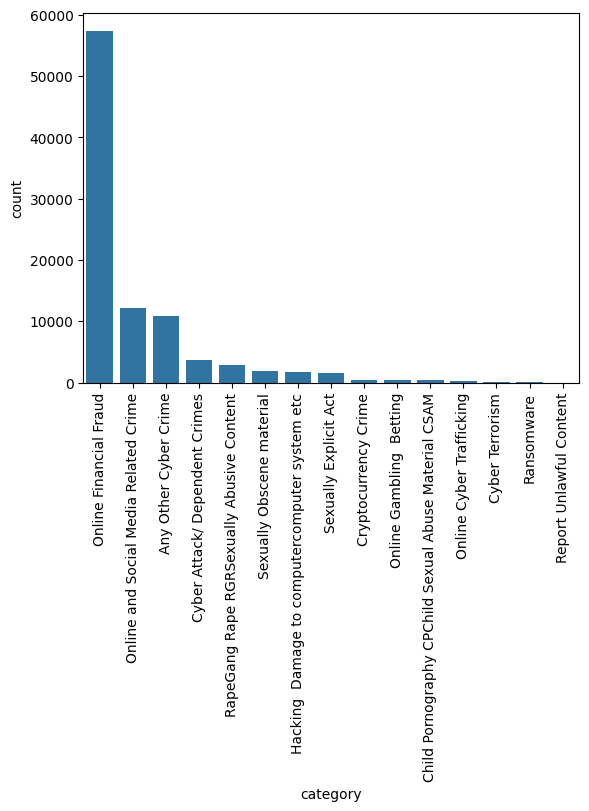

In [14]:

#if dataset is balanced or not
x=df['category'].value_counts()
print(x)
sns.barplot(x)
plt.xticks(rotation=90)

*Most of the complaints are in Online Financial Fraud*

**Lets take a look on the "crimeaditionalinfo" column**

In [15]:
# Getting WORD-COUNT of the crimeaditionalinfo
df['word_count'] = df['crimeaditionalinfo'].apply(lambda x: len(str(x).split()))

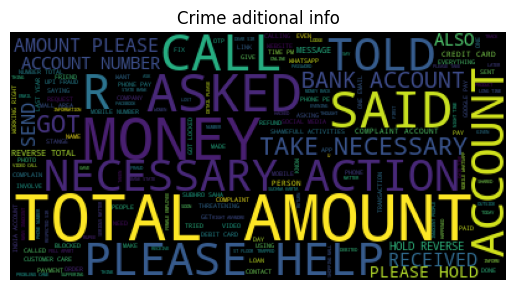

In [16]:
def cloud(text):
    try:
        text = text
    except Exception as e:
        text = str(text)
    wordcloud = WordCloud(stopwords=stop).generate(" ".join([i for i in text.str.upper()]))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.title("Crime aditional info")
cloud(df['crimeaditionalinfo'].astype(str))

# Pre Processing

In [17]:
#convert to lowercase and remove punctuations and characters and then strip
def preprocess(text):
    text = re.sub(r'\d',' ',text) #matches any digit from 0 to 100000..., \D matches non-digits
    text = text.lower() #lowercase text
    text=text.strip()  #get rid of leading/trailing whitespace 
    text=re.compile('<.*?>').sub('', text) #Remove HTML tags/markups
    text = re.compile('[%s]' % re.escape(string.punctuation)).sub(' ', text)  #Replace punctuation with space.
    text = re.sub('/\\s+/gm', ' ', text)  #Remove extra space and tabs
    text = re.sub(r'\[[0-9]*\]',' ',text) #[0-9] matches any digit (0 to 10000...)
    text=re.sub(r'[^\w\s]', '', str(text).lower().strip())
    text = re.sub(r'\s+',' ',text) #\s matches any whitespace, \s+ matches multiple whitespace, \S matches non-whitespace 
    
    return text
text = "      This is Parthasarathy & his team of 2 good friend!!        and this is for IndiaAI   "
text=preprocess(text)
print(text)  #text is a string

this is parthasarathy his team of good friend and this is for indiaai


In [18]:
#1. STOPWORD REMOVAL
def remove_stopword(string):
    a= [i for i in string.split() if i not in stopwords.words('english')]
    return ' '.join(a)

text=remove_stopword(text)
print(text)

parthasarathy team good friend indiaai


In [19]:
# Initialize the stemmer
snow = SnowballStemmer('english')
def stemming(string):
    a=[snow.stem(i) for i in word_tokenize(string) ]
    return " ".join(a)
text=stemming(text)
print(text)

parthasarathi team good friend indiaai


In [20]:
#3. LEMMATIZATION
# Initialize the lemmatizer
wl = WordNetLemmatizer()
 
# This is a helper function to map NTLK position tags
# Full list is available here: https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

# Tokenize the sentence
def lemmatizer(string):
    word_pos_tags = nltk.pos_tag(word_tokenize(string)) # Get position tags
    a=[wl.lemmatize(tag[0], get_wordnet_pos(tag[1])) for idx, tag in enumerate(word_pos_tags)] # Map the position tag and lemmatize the word/token
    return " ".join(a)

text = lemmatizer(text)
print(text)

parthasarathi team good friend indiaai


In [21]:
#FINAL PREPROCESSING
def finalpreprocess(string):
    return lemmatizer(remove_stopword(preprocess(string)))

finalpreprocess("      This is Parthasarathy & his team of 2 good friend!!        and this is for IndiaAI   ")

'parthasarathy team good friend indiaai'

In [22]:
from tqdm import tqdm
tqdm.pandas()


df['clean_text'] = df['crimeaditionalinfo'].progress_apply(lambda x:finalpreprocess(str(x)))

100%|██████████| 93686/93686 [30:18<00:00, 51.52it/s]


In [23]:
df.columns

Index(['category', 'sub_category', 'crimeaditionalinfo', 'word_count',
       'clean_text'],
      dtype='object')

In [24]:
df.to_csv("category_and_cleandata.csv")

In [25]:
df = pd.read_csv("category_and_cleandata.csv")
df.shape

(93686, 6)

In [26]:
df.columns

Index(['Unnamed: 0', 'category', 'sub_category', 'crimeaditionalinfo',
       'word_count', 'clean_text'],
      dtype='object')

In [27]:
df_train = df[['category','clean_text']]
df_train

,category,clean_text
0,Online and Social Media Related Crime,continue receive random call abusive message w...
1,Online Financial Fraud,fraudster continuously message ask pay money s...
2,Online Gambling Betting,act like police demand money add section text ...
3,Online and Social Media Related Crime,apna job apply job interview telecalling resou...
4,Online Financial Fraud,receive call lady state send new phone vivo re...
...,...,...
93681,Online Financial Fraud,identity theft smishing sms fraud creditdebit ...
93682,Online Financial Fraud,receive call number ask phone pay cash back of...
93683,Online Financial Fraud,cyber stalk blackmail phonesmsvoip call victim...
93684,Online and Social Media Related Crime,call karke bola ki aapka lotary laga ha aru ac...


In [28]:
#SPLITTING THE TRAINING DATASET INTO TRAINING AND VALIDATION
 
X_train, X_val, y_train, y_val = train_test_split(df_train["clean_text"].astype(str),
                                                  df_train["category"].astype(str),
                                                  test_size=0.2,
                                                  shuffle=True)
X_train_tok= [nltk.word_tokenize(i) for i in X_train]  #for word2vec
X_val_tok= [nltk.word_tokenize(i) for i in X_val]      #for word2vec

In [29]:
#TF-IDF
# Convert x_train to vector since model can only run on numbers and not words- Fit and transform
tfidf_vectorizer = TfidfVectorizer(use_idf=True)
X_train_vectors_tfidf = tfidf_vectorizer.fit_transform(X_train) #tfidf runs on non-tokenized sentences unlike word2vec
# Only transform x_test (not fit and transform)
X_val_vectors_tfidf = tfidf_vectorizer.transform(X_val) #Don't fit() your TfidfVectorizer to your test data: it will 
#change the word-indexes & weights to match test data. Rather, fit on the training data, then use the same train-data-
#fit model on the test data, to reflect the fact you're analyzing the test data only based on what was learned without 
#it, and the have compatible


# Building ML models (Text-classification)

**LR (tf-idf)**

In [30]:
#FITTING THE CLASSIFICATION MODEL using Logistic Regression(tf-idf)

lr_tfidf=LogisticRegression(solver = 'liblinear', C=10, penalty = 'l2')
lr_tfidf.fit(X_train_vectors_tfidf, y_train)  #model

#Predict y value for test dataset
y_predict = lr_tfidf.predict(X_val_vectors_tfidf)
y_prob = lr_tfidf.predict_proba(X_val_vectors_tfidf)[:,1]

print("---Test Set Results---")
print("Accuracy with LR(tf-idf): {}".format(accuracy_score(y_val, y_predict))) 

print(classification_report(y_val,y_predict))
# print('Confusion Matrix:',confusion_matrix(y_val, y_predict))

---Test Set Results---
Accuracy with LR(tf-idf): 0.7517878108656206
                                                      precision    recall  f1-score   support

                               Any Other Cyber Crime       0.43      0.28      0.34      2233
Child Pornography CPChild Sexual Abuse Material CSAM       0.80      0.30      0.44        80
                                Cryptocurrency Crime       0.72      0.45      0.55        96
                      Cyber Attack/ Dependent Crimes       1.00      1.00      1.00       720
                                     Cyber Terrorism       1.00      0.03      0.06        31
      Hacking  Damage to computercomputer system etc       0.43      0.26      0.32       333
                            Online Cyber Trafficking       0.00      0.00      0.00        43
                              Online Financial Fraud       0.82      0.93      0.87     11363
                            Online Gambling  Betting       0.88      0.07      0.13  

**NB (tf-idf)**

In [31]:
#FITTING THE CLASSIFICATION MODEL using Naive Bayes(tf-idf)
#It's a probabilistic classifier that makes use of Bayes' Theorem, a rule that uses probability to make predictions based on prior knowledge of conditions that might be related. This algorithm is the most suitable for such large dataset as it considers each feature independently, calculates the probability of each category, and then predicts the category with the highest probability.

nb_tfidf = MultinomialNB()
nb_tfidf.fit(X_train_vectors_tfidf, y_train)  #model

#Predict y value for test dataset
y_predict = nb_tfidf.predict(X_val_vectors_tfidf)
y_prob = nb_tfidf.predict_proba(X_val_vectors_tfidf)[:,1]
 
print("---Test Set Results---")
print("Accuracy with nb(tf-idf): {}".format(accuracy_score(y_val, y_predict))) 

print(classification_report(y_val,y_predict))

---Test Set Results---
Accuracy with nb(tf-idf): 0.7059451382217953


e:\ParthaLLMsLearning\IndiaAI_CyberGuard_AI_Hackathon\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



                                                      precision    recall  f1-score   support

                               Any Other Cyber Crime       0.81      0.01      0.02      2233
Child Pornography CPChild Sexual Abuse Material CSAM       0.00      0.00      0.00        80
                                Cryptocurrency Crime       0.00      0.00      0.00        96
                      Cyber Attack/ Dependent Crimes       1.00      1.00      1.00       720
                                     Cyber Terrorism       0.00      0.00      0.00        31
      Hacking  Damage to computercomputer system etc       0.00      0.00      0.00       333
                            Online Cyber Trafficking       0.00      0.00      0.00        43
                              Online Financial Fraud       0.69      1.00      0.82     11363
                            Online Gambling  Betting       0.00      0.00      0.00        97
               Online and Social Media Related Crime       

e:\ParthaLLMsLearning\IndiaAI_CyberGuard_AI_Hackathon\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

e:\ParthaLLMsLearning\IndiaAI_CyberGuard_AI_Hackathon\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [5]:
df = pd.read_csv("category_and_cleandata.csv")
df_train = df[['category','sub_category','clean_text']]
df_train

,category,sub_category,clean_text
0,Online and Social Media Related Crime,Cyber Bullying Stalking Sexting,continue receive random call abusive message w...
1,Online Financial Fraud,Fraud CallVishing,fraudster continuously message ask pay money s...
2,Online Gambling Betting,Online Gambling Betting,act like police demand money add section text ...
3,Online and Social Media Related Crime,Online Job Fraud,apna job apply job interview telecalling resou...
4,Online Financial Fraud,Fraud CallVishing,receive call lady state send new phone vivo re...
...,...,...,...
93681,Online Financial Fraud,Internet Banking Related Fraud,identity theft smishing sms fraud creditdebit ...
93682,Online Financial Fraud,EWallet Related Fraud,receive call number ask phone pay cash back of...
93683,Online Financial Fraud,UPI Related Frauds,cyber stalk blackmail phonesmsvoip call victim...
93684,Online and Social Media Related Crime,Online Matrimonial Fraud,call karke bola ki aapka lotary laga ha aru ac...


**FastText**

In [6]:
!pip install fasttext-wheel

In [7]:
# df_train['category'] = df_train['category'].astype(str) +" "+df_train['sub_category'].astype(str)
df_train['category'] = df_train['category'].astype(str)
df_train

C:\Users\Partha\AppData\Local\Temp\ipykernel_19248\1785772720.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,category,sub_category,clean_text
0,Online and Social Media Related Crime,Cyber Bullying Stalking Sexting,continue receive random call abusive message w...
1,Online Financial Fraud,Fraud CallVishing,fraudster continuously message ask pay money s...
2,Online Gambling Betting,Online Gambling Betting,act like police demand money add section text ...
3,Online and Social Media Related Crime,Online Job Fraud,apna job apply job interview telecalling resou...
4,Online Financial Fraud,Fraud CallVishing,receive call lady state send new phone vivo re...
...,...,...,...
93681,Online Financial Fraud,Internet Banking Related Fraud,identity theft smishing sms fraud creditdebit ...
93682,Online Financial Fraud,EWallet Related Fraud,receive call number ask phone pay cash back of...
93683,Online Financial Fraud,UPI Related Frauds,cyber stalk blackmail phonesmsvoip call victim...
93684,Online and Social Media Related Crime,Online Matrimonial Fraud,call karke bola ki aapka lotary laga ha aru ac...


In [8]:
df_train['category']

0        Online and Social Media Related Crime
1                       Online Financial Fraud
2                     Online Gambling  Betting
3        Online and Social Media Related Crime
4                       Online Financial Fraud
                         ...                  
93681                   Online Financial Fraud
93682                   Online Financial Fraud
93683                   Online Financial Fraud
93684    Online and Social Media Related Crime
93685                   Online Financial Fraud
Name: category, Length: 93686, dtype: object

In [9]:
# df_train.iloc['category'] = df_train['category'].apply(lambda x: f'__label__{x}')
df_train['category'] = ['__label__' + str(cat) for cat in df_train['category']]
df_train

C:\Users\Partha\AppData\Local\Temp\ipykernel_19248\2161864962.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,category,sub_category,clean_text
0,__label__Online and Social Media Related Crime,Cyber Bullying Stalking Sexting,continue receive random call abusive message w...
1,__label__Online Financial Fraud,Fraud CallVishing,fraudster continuously message ask pay money s...
2,__label__Online Gambling Betting,Online Gambling Betting,act like police demand money add section text ...
3,__label__Online and Social Media Related Crime,Online Job Fraud,apna job apply job interview telecalling resou...
4,__label__Online Financial Fraud,Fraud CallVishing,receive call lady state send new phone vivo re...
...,...,...,...
93681,__label__Online Financial Fraud,Internet Banking Related Fraud,identity theft smishing sms fraud creditdebit ...
93682,__label__Online Financial Fraud,EWallet Related Fraud,receive call number ask phone pay cash back of...
93683,__label__Online Financial Fraud,UPI Related Frauds,cyber stalk blackmail phonesmsvoip call victim...
93684,__label__Online and Social Media Related Crime,Online Matrimonial Fraud,call karke bola ki aapka lotary laga ha aru ac...


In [10]:
df_train['category_crime_info'] = df_train['category']+" "+df_train['clean_text']


C:\Users\Partha\AppData\Local\Temp\ipykernel_19248\3657979087.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [11]:
print(f"{df_train['category_crime_info'][0]}")

__label__Online and Social Media Related Crime continue receive random call abusive message whatsapp someone add number unknown facebook group name girl still get call unknown number pls help sort issue soon possible thank


In [12]:
train, test = train_test_split(df_train,test_size=0.2)

In [13]:
print(df_train.shape)
print(train.shape)
print(test.shape)

(93686, 4)
(74948, 4)
(18738, 4)


In [14]:
train.to_csv("crime_info.train",columns=['category_crime_info'],index=False,header=False)
test.to_csv("crime_info.test",columns=['category_crime_info'],index=False,header=False)

In [15]:
import fasttext

In [16]:
model = fasttext.train_supervised(input="crime_info.train")


In [17]:
model.save_model("model_crime_trained.bin")

In [18]:
success_row, pression, recall = model.test("crime_info.test")

In [19]:
print(f"Total Test sample Rows    : {test.shape[0]}")
print(f"Total Test Success Rows   : {success_row}")
print(f"Test data's Precision     : {pression*100}")
print(f"Test data's Recall        : {recall*100}")

Total Test sample Rows    : 18738
Total Test Success Rows   : 18489
Test data's Precision     : 99.69170858348207
Test data's Recall        : 99.69170858348207


In [23]:
import fasttext
model_path = 'model_crime_trained.bin'
model_en = fasttext.load_model(model_path)
model_en.get_nearest_neighbors('credit debit cards')
# model_en.get_word_vector("good").shape

[(0.0, 'Fraud'),
 (0.0, 'account'),
 (0.0, 'amount'),
 (0.0, 'bank'),
 (0.0, 'call'),
 (0.0, 'fraud'),
 (0.0, 'please'),
 (0.0, 'codepatm'),
 (0.0, 'ohnune'),
 (0.0, 'aie')]

In [29]:
!pip install fasttext

  error: subprocess-exited-with-error
  
  × Building wheel for fasttext (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [31 lines of output]
      C:\Users\Partha\AppData\Local\Temp\pip-build-env-blj2xw8v\overlay\Lib\site-packages\setuptools\dist.py:495: SetuptoolsDeprecationWarning: Invalid dash-separated options
      !!
      
              ********************************************************************************
              Usage of dash-separated 'description-file' will not be supported in future
              versions. Please use the underscore name 'description_file' instead.
      
              By 2025-Mar-03, you need to update your project and remove deprecated calls
              or your builds will no longer be supported.
      
              See https://setuptools.pypa.io/en/latest/userguide/declarative_config.html for details.
              ********************************************************************************
      
      !!
       


  Using cached fasttext-0.9.3.tar.gz (73 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
Failed to build fasttext


In [30]:
!pip install --upgrade fasttext-wheel numpy==2.0.0

   ---------------------------------------- 0.0/16.2 MB ? eta -:--:--
    --------------------------------------- 0.3/16.2 MB ? eta -:--:--
   -- ------------------------------------- 1.0/16.2 MB 3.1 MB/s eta 0:00:05
   --- ------------------------------------ 1.6/16.2 MB 2.9 MB/s eta 0:00:06
   ----- ---------------------------------- 2.1/16.2 MB 3.0 MB/s eta 0:00:05
   ------- -------------------------------- 2.9/16.2 MB 2.9 MB/s eta 0:00:05
   -------- ------------------------------- 3.4/16.2 MB 3.0 MB/s eta 0:00:05
   --------- ------------------------------ 3.9/16.2 MB 3.0 MB/s eta 0:00:05
   ----------- ---------------------------- 4.7/16.2 MB 3.0 MB/s eta 0:00:04
   ------------ --------------------------- 5.2/16.2 MB 3.0 MB/s eta 0:00:04
   -------------- ------------------------- 6.0/16.2 MB 3.0 MB/s eta 0:00:04
   ---------------- ----------------------- 6.6/16.2 MB 3.0 MB/s eta 0:00:04
   ---------------- ----------------------- 6.8/16.2 MB 2.9 MB/s eta 0:00:04
   ----------

In [28]:
# Assuming model_en is your FastText model
labels, probs = model_en.predict("credit debit cards")

# Convert probs to a NumPy array if necessary
probs_array = np.asarray(probs)

# Now you can use probs_array as needed
print(probs_array)

ValueError: Unable to avoid copy while creating an array as requested.
If using `np.array(obj, copy=False)` replace it with `np.asarray(obj)` to allow a copy when needed (no behavior change in NumPy 1.x).
For more details, see https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword.

In [24]:
model.predict("my credit card details are stolen")

ValueError: Unable to avoid copy while creating an array as requested.
If using `np.array(obj, copy=False)` replace it with `np.asarray(obj)` to allow a copy when needed (no behavior change in NumPy 1.x).
For more details, see https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword.

# Pipeline

In [113]:
#convert to lowercase and remove punctuations and characters and then strip
def preprocess(text):
    text = re.sub(r'\d',' ',text) #matches any digit from 0 to 100000..., \D matches non-digits
    text = text.lower() #lowercase text
    text=text.strip()  #get rid of leading/trailing whitespace 
    text=re.compile('<.*?>').sub('', text) #Remove HTML tags/markups
    text = re.compile('[%s]' % re.escape(string.punctuation)).sub(' ', text)  #Replace punctuation with space.
    text = re.sub('/\\s+/gm', ' ', text)  #Remove extra space and tabs
    text = re.sub(r'\[[0-9]*\]',' ',text) #[0-9] matches any digit (0 to 10000...)
    text=re.sub(r'[^\w\s]', '', str(text).lower().strip())
    text = re.sub(r'\s+',' ',text) #\s matches any whitespace, \s+ matches multiple whitespace, \S matches non-whitespace 
    
    return text
text = "      This is Parthasarathy & his team of 2 good friend!!        and this is for IndiaAI   "
text=preprocess(text)
print(text)  #text is a string

#1. STOPWORD REMOVAL
def remove_stopword(string):
    a= [i for i in string.split() if i not in stopwords.words('english')]
    return ' '.join(a)

text=remove_stopword(text)
print(text)

# Initialize the stemmer
snow = SnowballStemmer('english')
def stemming(string):
    a=[snow.stem(i) for i in word_tokenize(string) ]
    return " ".join(a)
text=stemming(text)
print(text)

#3. LEMMATIZATION
# Initialize the lemmatizer
wl = WordNetLemmatizer()
 
# This is a helper function to map NTLK position tags
# Full list is available here: https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

# Tokenize the sentence
def lemmatizer(string):
    word_pos_tags = nltk.pos_tag(word_tokenize(string)) # Get position tags
    a=[wl.lemmatize(tag[0], get_wordnet_pos(tag[1])) for idx, tag in enumerate(word_pos_tags)] # Map the position tag and lemmatize the word/token
    return " ".join(a)

text = lemmatizer(text)
print(text)

#FINAL PREPROCESSING
def finalpreprocess(string):
    return lemmatizer(remove_stopword(preprocess(string)))

finalpreprocess("      This is Parthasarathy & his team of 2 good friend!!        and this is for IndiaAI   ")

this is parthasarathy his team of good friend and this is for indiaai
parthasarathy team good friend indiaai
parthasarathi team good friend indiaai
parthasarathi team good friend indiaai


'parthasarathy team good friend indiaai'

In [114]:
# cleaning text

from tqdm import tqdm
tqdm.pandas()

def cleantext(df, text_column):
    df['clean_text'] = df[text_column].progress_apply(lambda x:finalpreprocess(str(x)))
    texts = df['clean_text'].tolist()
    # true_labels = df[category_columns].tolist()
    return texts, df

In [115]:
import pandas as pd

def load_data(file_path):
    df = pd.read_csv(file_path)
    print(df.columns)
    return df

In [116]:
import fasttext
def load_model(model_path):
    model = fasttext.load_model(model_path)
    return model

In [133]:
def predict_texts(model, texts):
    predictions = [model.predict(text) for text in texts]  # [0][0] retrieves the label only
    return predictions

In [118]:
def save_predictions(file_path, texts, predictions):
    df = pd.DataFrame({'text': texts, 'prediction': predictions})
    df.to_csv(file_path, index=False)

In [119]:
from sklearn.metrics import accuracy_score

def calculate_accuracy(true_labels, predictions):
    """Calculate accuracy between true labels and predictions."""
    return accuracy_score(true_labels, predictions)

In [125]:
def full_pipeline(input_file,category_columns, text_column, model_path, output_file):
    print(f"Step 1: Loading the {input_file} file")
    df = load_data(input_file)
    print(f"\nStep 2: cleaning the {text_column} column")
    texts, df = cleantext(df,text_column)
    print(f"\nStep 3: Loading the model from {model_path}")
    model = load_model(model_path)
    
    df['category'] = df[category_columns[0]] +" "+df[category_columns[1]]
    true_labels = df['category'].tolist()
    df['category'] = ['__label__' + str(cat) for cat in df['category']]
    df['category_crime_info'] = df['category']+" "+df['clean_text']
    df.to_csv("partha_tst.csv")
    texts = df['category_crime_info'].tolist()
    
    print(f"\nStep 4: Performing the prediction")
    predictions = predict_texts(model, texts)

    print(f"\nStep 5: Accuracy calculation")
    accuracy = calculate_accuracy(true_labels, predictions)
    
    print(f"\nAccuracy: {accuracy * 100:.2f}%")
    print(f"\nStep 6: Saving the prediction on output file")
    save_predictions(output_file, texts, predictions)
    print(f"\nStep 7: Completed")

In [126]:
# category,sub_category,crimeaditionalinfo

input_file = 'test.csv'
category_columns = ['category','sub_category']
text_column = 'crimeaditionalinfo'  # Replace with your actual column name
model_path = 'model_crime_trained.bin'
output_file = 'output_submission.csv'

full_pipeline(input_file,category_columns, text_column, model_path, output_file)

Step 1: Loading the test.csv file
Index(['category', 'sub_category', 'crimeaditionalinfo'], dtype='object')

Step 2: cleaning the crimeaditionalinfo column


100%|██████████| 31229/31229 [10:14<00:00, 50.84it/s]



Step 3: Loading the model from model_crime_trained.bin

Step 4: Performing the prediction


ValueError: Unable to avoid copy while creating an array as requested.
If using `np.array(obj, copy=False)` replace it with `np.asarray(obj)` to allow a copy when needed (no behavior change in NumPy 1.x).
For more details, see https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword.

In [127]:
partha = pd.read_csv("partha_tst.csv")
partha


,Unnamed: 0,category,sub_category,crimeaditionalinfo,clean_text,category_crime_info
0,0,__label__nan,NaN,Sir namaskar mein Ranjit Kumar PatraPaise neh...,sir namaskar mein ranjit kumar patrapaise nehi...,__label__nan sir namaskar mein ranjit kumar pa...
1,1,__label__Online Financial Fraud DebitCredit Ca...,DebitCredit Card FraudSim Swap Fraud,KOTAK MAHINDRA BANK FRAUD\r\nFRAUD AMOUNT,kotak mahindra bank fraud fraud amount,__label__Online Financial Fraud DebitCredit Ca...
2,2,__label__Cyber Attack/ Dependent Crimes SQL In...,SQL Injection,The issue actually started when I got this ema...,issue actually start get email first glance se...,__label__Cyber Attack/ Dependent Crimes SQL In...
3,3,__label__Online Financial Fraud Fraud CallVishing,Fraud CallVishing,I am amit kumar from karwi chitrakoot I am tot...,amit kumar karwi chitrakoot totally depressed ...,__label__Online Financial Fraud Fraud CallVish...
4,4,__label__Any Other Cyber Crime Other,Other,I have ordered saree and blouse from rinki s...,order saree blouse rinki sur pay amount take p...,__label__Any Other Cyber Crime Other order sar...
...,...,...,...,...,...,...
31224,31224,__label__Online and Social Media Related Crime...,Online Matrimonial Fraud,A lady named Rashmi probably a fake name had c...,lady name rashmi probably fake name call day a...,__label__Online and Social Media Related Crime...
31225,31225,__label__Online Financial Fraud Internet Banki...,Internet Banking Related Fraud,I am Mr Chokhe Ram Two pers mobile number wer...,mr chokhe ram two pers mobile number find gool...,__label__Online Financial Fraud Internet Banki...
31226,31226,__label__Any Other Cyber Crime Other,Other,Mai Bibekbraj maine pahle ki complain kar chuk...,mai bibekbraj maine pahle ki complain kar chuk...,__label__Any Other Cyber Crime Other mai bibek...
31227,31227,__label__Online Financial Fraud Internet Banki...,Internet Banking Related Fraud,received URL link for updating KYC from mobile...,receive url link update kyc mobile open receiv...,__label__Online Financial Fraud Internet Banki...


In [131]:
texts = partha['clean_text'].tolist()
texts

['sir namaskar mein ranjit kumar patrapaise nehi tho sir kuch din pehele online loan aap credit pearl loan aap se money loan kiya thalekin sir loan bolke jub loan diye tho mein turant return kar diya thalekin din baad whats app pe message aya payment karomein bola diye aap mein wo de diyawo gali diye tho v return kar diyafir v message karke bolte hai full payment karo half payment nehi chalegarape case mein daldenge etcfake illigal se contact number v hack kar dete haibol rahehai sab ko message karenge ye rapist hai bolke sirpls sir small ammount ke liye goggle play store se loan apply kiya thafake loan aap v hai socha nehi thapls sir request kar rahahun action lo sir mera number hai jo v proof chahiye dunga sir',
 'kotak mahindra bank fraud fraud amount',
 'issue actually start get email first glance seem like spam usually ignore thing reason open time afterward phone start freeze wasnt normal think technical glitch im sure know like knew everything even though try careful terrify thi

In [137]:
texts[0]

'sir namaskar mein ranjit kumar patrapaise nehi tho sir kuch din pehele online loan aap credit pearl loan aap se money loan kiya thalekin sir loan bolke jub loan diye tho mein turant return kar diya thalekin din baad whats app pe message aya payment karomein bola diye aap mein wo de diyawo gali diye tho v return kar diyafir v message karke bolte hai full payment karo half payment nehi chalegarape case mein daldenge etcfake illigal se contact number v hack kar dete haibol rahehai sab ko message karenge ye rapist hai bolke sirpls sir small ammount ke liye goggle play store se loan apply kiya thafake loan aap v hai socha nehi thapls sir request kar rahahun action lo sir mera number hai jo v proof chahiye dunga sir'

In [141]:
!pip install numpy==1.21

  Using cached numpy-1.21.0.zip (10.3 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'


ERROR: Exception:
Traceback (most recent call last):
  File "e:\ParthaLLMsLearning\IndiaAI_CyberGuard_AI_Hackathon\.venv\Lib\site-packages\pip\_internal\cli\base_command.py", line 105, in _run_wrapper
    status = _inner_run()
             ^^^^^^^^^^^^
  File "e:\ParthaLLMsLearning\IndiaAI_CyberGuard_AI_Hackathon\.venv\Lib\site-packages\pip\_internal\cli\base_command.py", line 96, in _inner_run
    return self.run(options, args)
           ^^^^^^^^^^^^^^^^^^^^^^^
  File "e:\ParthaLLMsLearning\IndiaAI_CyberGuard_AI_Hackathon\.venv\Lib\site-packages\pip\_internal\cli\req_command.py", line 67, in wrapper
    return func(self, options, args)
           ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "e:\ParthaLLMsLearning\IndiaAI_CyberGuard_AI_Hackathon\.venv\Lib\site-packages\pip\_internal\commands\install.py", line 379, in run
    requirement_set = resolver.resolve(
                      ^^^^^^^^^^^^^^^^^
  File "e:\ParthaLLMsLearning\IndiaAI_CyberGuard_AI_Hackathon\.venv\Lib\site-packages\pip\_interna

In [142]:
model_path = 'model_crime_trained.bin'
model = load_model(model_path)

In [154]:
txt = texts[0]
txt

'sir namaskar mein ranjit kumar patrapaise nehi tho sir kuch din pehele online loan aap credit pearl loan aap se money loan kiya thalekin sir loan bolke jub loan diye tho mein turant return kar diya thalekin din baad whats app pe message aya payment karomein bola diye aap mein wo de diyawo gali diye tho v return kar diyafir v message karke bolte hai full payment karo half payment nehi chalegarape case mein daldenge etcfake illigal se contact number v hack kar dete haibol rahehai sab ko message karenge ye rapist hai bolke sirpls sir small ammount ke liye goggle play store se loan apply kiya thafake loan aap v hai socha nehi thapls sir request kar rahahun action lo sir mera number hai jo v proof chahiye dunga sir'

In [156]:
model.predict("my credit card details are stolen")

ValueError: Unable to avoid copy while creating an array as requested.
If using `np.array(obj, copy=False)` replace it with `np.asarray(obj)` to allow a copy when needed (no behavior change in NumPy 1.x).
For more details, see https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword.

In [143]:
# predictions = model.predict(texts[0])
predictions = [model.predict(txt)[0][0]]
predictions

ValueError: Unable to avoid copy while creating an array as requested.
If using `np.array(obj, copy=False)` replace it with `np.asarray(obj)` to allow a copy when needed (no behavior change in NumPy 1.x).
For more details, see https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword.

In [134]:
print(f"\nStep 4: Performing the prediction")
predictions = predict_texts(model, texts)


Step 4: Performing the prediction


ValueError: Unable to avoid copy while creating an array as requested.
If using `np.array(obj, copy=False)` replace it with `np.asarray(obj)` to allow a copy when needed (no behavior change in NumPy 1.x).
For more details, see https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword.